# WeatherPy
----

## Please READ
* Some of the below dependencies may require you to install the specific packages if your environment does not already have them

# Observations

* The lat and long range cover the entire Earth, therefore the city function ingested with randomized coordinates will randomly pick cities from every corner of the Earth. We could narrow it down to a specific part of the World to and get a smaller city list to work with.

* From Latitude vs Temperature scatter plot it is clear that the South Hemisphere is warmer than the North Hemisphere despite few outliers. This is because at this time of the year it is summer in South Hemisphere. 

* There is a strong correlation between the Temperature and Latitude.

* Although Latitude vs. Humidity does not show clear correlation the further analysis based on the Hemispheres show weak correlation. In North Hemisphere, closer to the equator the less the humidity. There is less data for the South Hemisphere since for the most part it is covered with Ocean bur from the available data we can see that the humidity is more or less identical with some outliers between Lat [-20, -40].

* There is a weak correlation between Cloudiness and the Latitude. Statistically Cloudiness is highest around 60 degrees South but the most of it is covered with Ocean and that information is not available in our dataset.

* It looks like for the most part in the cities in our database the wind speed does not exceed 10 mph. Northern cities tend to have least favorable weather conditions and at and above 50 degrees North the winds get constantly higher. This is especially true for the Southern Hemisphere. Souther we go, greater the wind speed.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

641

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
cities_df = pd.DataFrame(columns={"City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"}, index=np.arange(0, len(cities)))

cities = np.array(cities)
print("Beginning Data Retrieval\n")
set_iter = 1
for index, city in np.ndenumerate(cities):
    internal_city = city
    if len(city.split()) > 1:
        internal_city = "%20".join(city.split())
    url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q={internal_city}&units=Imperial"
    response = requests.get(url).json()
    time.sleep(1)
    try:
        cities_df.loc[index, "City"] = response['name']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        print(f"Processing Record {index[0]%50 + 1} of Set {set_iter} | {city}")
    except:
        print("City not found. Skipping...")
    
    if (index[0] + 1)%50 == 0:
        set_iter += 1
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval

Processing Record 1 of Set 1 | barrow
Processing Record 2 of Set 1 | buin
Processing Record 3 of Set 1 | norman wells
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | kahului
Processing Record 6 of Set 1 | edinet
City not found. Skipping...
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | punta arenas
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | esperance
Processing Record 13 of Set 1 | gewane
Processing Record 14 of Set 1 | nome
Processing Record 15 of Set 1 | port lincoln
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | khor
City not found. Skipping...
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | taoudenni
Processing Record 21 of Set 1 | concepcion
Processing Record 22 of Set 1 | vostok
Processing Record 23 of Set 1 | pavlovka
Processing Record 24 of Set 1 | castro
Processing Record 25 of Set 

City not found. Skipping...
Processing Record 7 of Set 5 | yantal
Processing Record 8 of Set 5 | rio grande
Processing Record 9 of Set 5 | sao gabriel da cachoeira
Processing Record 10 of Set 5 | barcelos
Processing Record 11 of Set 5 | virginia beach
Processing Record 12 of Set 5 | ipixuna
Processing Record 13 of Set 5 | qaqortoq
Processing Record 14 of Set 5 | kupang
Processing Record 15 of Set 5 | north bend
Processing Record 16 of Set 5 | vila franca do campo
City not found. Skipping...
Processing Record 18 of Set 5 | liverpool
Processing Record 19 of Set 5 | sur
Processing Record 20 of Set 5 | nantucket
Processing Record 21 of Set 5 | bengkulu
Processing Record 22 of Set 5 | arraial do cabo
City not found. Skipping...
Processing Record 24 of Set 5 | carnarvon
Processing Record 25 of Set 5 | dunedin
Processing Record 26 of Set 5 | saint george
Processing Record 27 of Set 5 | sola
Processing Record 28 of Set 5 | mayo
Processing Record 29 of Set 5 | svetlogorsk
Processing Record 30 o

Processing Record 11 of Set 9 | portel
Processing Record 12 of Set 9 | wanning
Processing Record 13 of Set 9 | margherita
Processing Record 14 of Set 9 | banjarmasin
Processing Record 15 of Set 9 | yeppoon
Processing Record 16 of Set 9 | nizhniy baskunchak
Processing Record 17 of Set 9 | chuy
Processing Record 18 of Set 9 | oussouye
Processing Record 19 of Set 9 | santa marta de tormes
Processing Record 20 of Set 9 | san juan
Processing Record 21 of Set 9 | dhidhdhoo
Processing Record 22 of Set 9 | badou
Processing Record 23 of Set 9 | boguchany
City not found. Skipping...
Processing Record 25 of Set 9 | waddan
Processing Record 26 of Set 9 | hirado
Processing Record 27 of Set 9 | kyra
Processing Record 28 of Set 9 | revelstoke
Processing Record 29 of Set 9 | kununurra
Processing Record 30 of Set 9 | juneau
Processing Record 31 of Set 9 | dutse
Processing Record 32 of Set 9 | bayir
Processing Record 33 of Set 9 | wellington
Processing Record 34 of Set 9 | benghazi
Processing Record 35 

Processing Record 11 of Set 13 | kongoussi
City not found. Skipping...
Processing Record 13 of Set 13 | kushmurun
Processing Record 14 of Set 13 | ouango
Processing Record 15 of Set 13 | piacabucu
Processing Record 16 of Set 13 | labuhan
City not found. Skipping...
Processing Record 18 of Set 13 | nanakuli
Processing Record 19 of Set 13 | gwadar
Processing Record 20 of Set 13 | kargil
Processing Record 21 of Set 13 | jerez
Processing Record 22 of Set 13 | enkoping
Processing Record 23 of Set 13 | dubbo
Processing Record 24 of Set 13 | balad
Processing Record 25 of Set 13 | sao jose da coroa grande
Processing Record 26 of Set 13 | colares
Processing Record 27 of Set 13 | brumunddal
Processing Record 28 of Set 13 | baillif
Processing Record 29 of Set 13 | hambantota
Processing Record 30 of Set 13 | saint-augustin
Processing Record 31 of Set 13 | bereda
Processing Record 32 of Set 13 | satara
Processing Record 33 of Set 13 | kazachinskoye
Processing Record 34 of Set 13 | noumea
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Here we are making sure that the dataframe does not contain any NAN and null values and storing data into csv file
cities_df = cities_df.dropna()
cities_df['parsed_time'] = pd.to_datetime(cities_df['Date'], unit='s')
cities_df.to_csv('cities.csv', index=False)
cities_df

,Date,Cloudiness,Wind Speed,Lat,Lng,Max Temp,Country,City,Humidity,parsed_time
0,1580071598,40,5.82,-21.2,-175.2,80.6,TO,Vaini,88,2020-01-26 20:46:38
1,1580071696,100,3.56,-0.6,73.08,80.83,MV,Hithadhoo,77,2020-01-26 20:48:16
2,1580071732,0,1.19,36.52,46.21,11.07,IR,Bukan,83,2020-01-26 20:48:52
3,1580071642,1,9.17,71.29,-156.79,-23.8,US,Barrow,74,2020-01-26 20:47:22
5,1580071736,20,6.93,-34.15,19.02,63,ZA,Grabouw,72,2020-01-26 20:48:56
...,...,...,...,...,...,...,...,...,...,...
599,1580072398,100,1.7,50.59,107.6,0.93,RU,Bichura,83,2020-01-26 20:59:58
600,1580072399,100,2.17,-4.24,142.84,74.64,PG,Ambunti,99,2020-01-26 20:59:59
601,1580072400,20,5.82,51.03,-4.22,46.99,GB,Northam,100,2020-01-26 21:00:00
602,1580072401,0,12.75,-23.67,-46.46,84.2,BR,Maua,28,2020-01-26 21:00:01


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

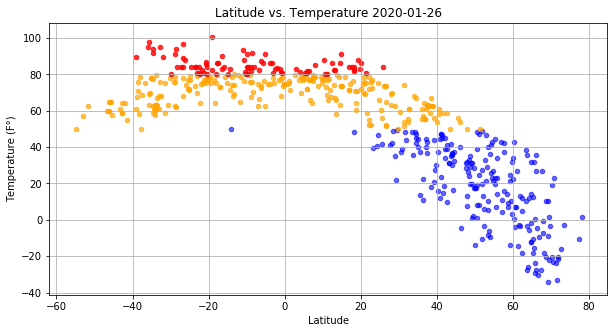

In [12]:
cities_df = pd.read_csv('cities.csv')

plt.figure(figsize=(10,5))

# Set conditions for different climate patterns
cold = cities_df[cities_df['Max Temp'] < 50]
warm = cities_df[(cities_df['Max Temp'] >= 50) & (cities_df['Max Temp'] < 80)]
hot = cities_df[cities_df['Max Temp'] >=80]

temp_date = cities_df['parsed_time'].values[0].split(' ')[0]
#For a better visualization it was decided to assign colors for range of temperatures [Cold, Warm, Hot]
plt.scatter(cold['Lat'], cold['Max Temp'], color = 'b', s=20, alpha=0.6)
plt.scatter(warm['Lat'], warm['Max Temp'], color = 'orange', s=20, alpha=0.7)
plt.scatter(hot['Lat'], hot['Max Temp'], color = 'r', s=20, alpha=0.8)
plt.title(f"Latitude vs. Temperature {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Temperature (F\N{DEGREE SIGN})')
plt.grid()
plt.show()

#### Latitude vs. Humidity Plot

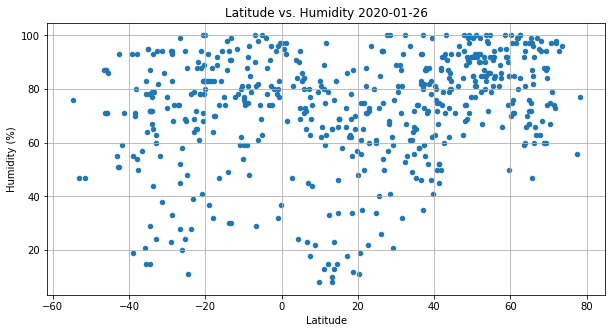

In [13]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Humidity'], s=20)
plt.title(f"Latitude vs. Humidity {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

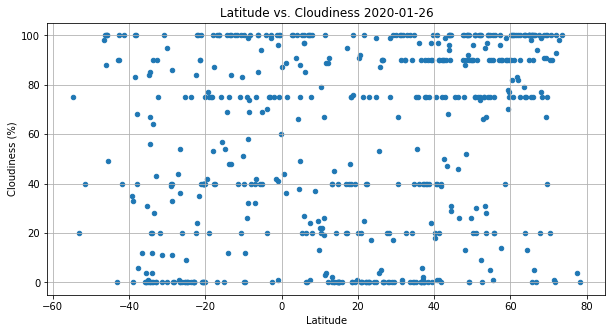

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Cloudiness'], s=20)
plt.title(f"Latitude vs. Cloudiness {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

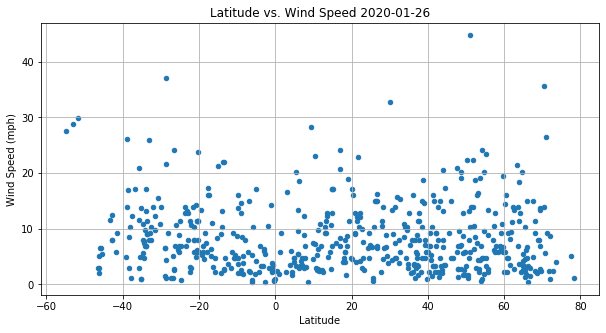

In [15]:
plt.figure(figsize=(10,5))
plt.scatter(cities_df.Lat, cities_df['Wind Speed'],s=20)
plt.title(f"Latitude vs. Wind Speed {temp_date}")
plt.xlabel("Latitude")
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

### OPTIONAL: Create a function to create Linear Regression plots


In [16]:
def lin_regress(x, y):
    slope, intercept, _, _, _ = linregress(x, y)
    fit_model = slope * x + intercept
    return slope, intercept, fit_model
    

In [17]:
# Create Northern and Southern Hemisphere DataFrames
n_hemis_df = cities_df[cities_df['Lat'] > 0]
s_hemis_df = cities_df[cities_df['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = -0.5585373000889824
Intercept: = 61.29578596055163

Correlation between Temperature and Latitute           Max Temp       Lat
Max Temp  1.000000 -0.875797
Lat      -0.875797  1.000000



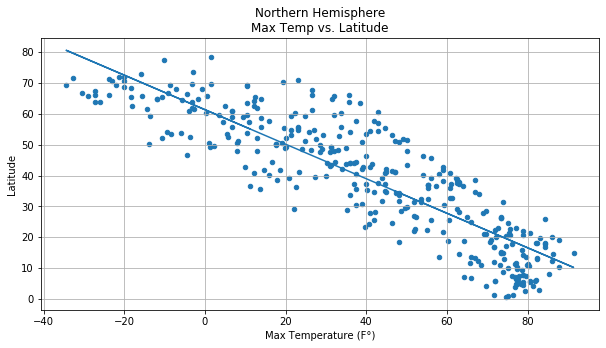

In [18]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Max Temp'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Temperature and Latitute {n_hemis_df[['Max Temp', 'Lat']].corr()}\n")


plt.figure('north',figsize=(10,5))
plt.title('Northern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

cold_n = n_hemis_df[n_hemis_df['Max Temp'] < 50]
warm_n = n_hemis_df[(n_hemis_df['Max Temp'] >= 50) & (n_hemis_df['Max Temp'] < 80)]
hot_n = n_hemis_df[n_hemis_df['Max Temp'] >=80]

plt.grid()
plt.scatter(n_hemis_df['Max Temp'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Max Temp'], fit_model)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Slope = 0.542372885933122
Intercept: = -63.17288972997069

Correlation between Temperature and Latitute           Max Temp       Lat
Max Temp  1.000000  0.420432
Lat       0.420432  1.000000



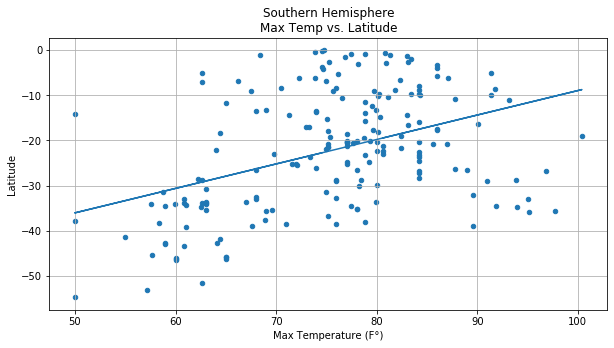

In [19]:
slope, intercept,fit_model = lin_regress(s_hemis_df['Max Temp'],s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Temperature and Latitute {s_hemis_df[['Max Temp', 'Lat']].corr()}\n")

plt.figure('south',figsize=(10,5))

plt.title('Southern Hemisphere\nMax Temp vs. Latitude')
plt.xlabel("Max Temperature (F\N{DEGREE SIGN})")
plt.ylabel('Latitude')

plt.grid()
plt.scatter(s_hemis_df['Max Temp'],s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Max Temp'], fit_model)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.39861673469111225
Intercept: = 9.504192047273918

Correlation between Humidity and Latitute           Humidity       Lat
Humidity  1.000000  0.408962
Lat       0.408962  1.000000



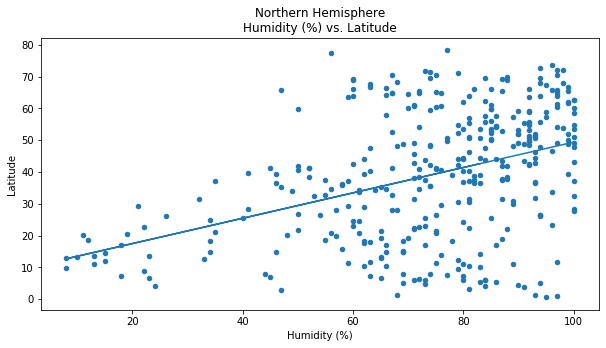

In [20]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Humidity'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {n_hemis_df[['Humidity', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))
plt.title('Northern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Humidity'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Humidity'], fit_model)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Slope = 0.13169191566949762
Intercept: = -31.641496691484686

Correlation between Humidity and Latitute           Humidity       Lat
Humidity  1.000000  0.213924
Lat       0.213924  1.000000



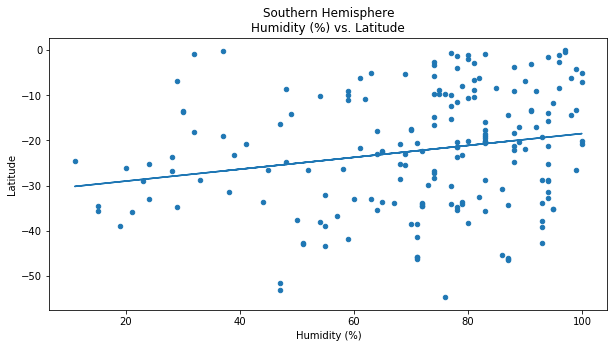

In [21]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Humidity'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Humidity and Latitute {s_hemis_df[['Humidity', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))
plt.title('Southern Hemisphere\nHumidity (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Humidity'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Humidity'], fit_model)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.16029234377462626
Intercept: = 29.63741277015434

Correlation between Cloudiness and Latitute             Cloudiness       Lat
Cloudiness    1.000000  0.311163
Lat           0.311163  1.000000



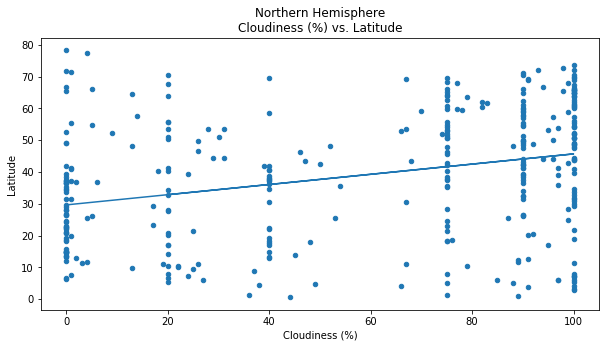

In [22]:
slope, intercept, fit_model = lin_regress(n_hemis_df['Cloudiness'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Cloudiness and Latitute {n_hemis_df[['Cloudiness', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Cloudiness (%)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Cloudiness'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Cloudiness'], fit_model)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Slope = 0.06495696654562316
Intercept: = -25.43416928333462

Correlation between Cloudiness and Latitute             Cloudiness       Lat
Cloudiness    1.000000  0.186099
Lat           0.186099  1.000000



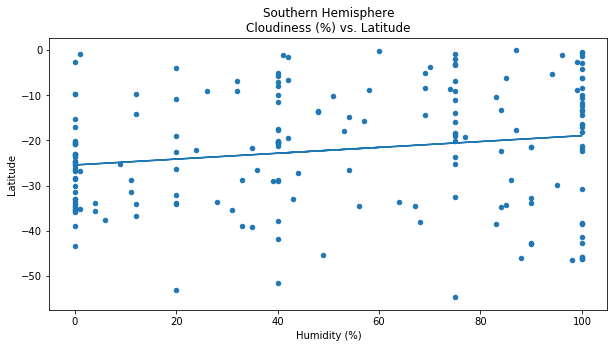

In [23]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Cloudiness'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Cloudiness and Latitute {s_hemis_df[['Cloudiness', 'Lat']].corr()}\n")


plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nCloudiness (%) vs. Latitude')
plt.xlabel("Humidity (%)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Cloudiness'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Cloudiness'], fit_model)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = 0.03580509872821814
Intercept: = 38.6719336282974

Correlation between Wind Speed and Latitute             Wind Speed       Lat
Wind Speed    1.000000  0.011045
Lat           0.011045  1.000000



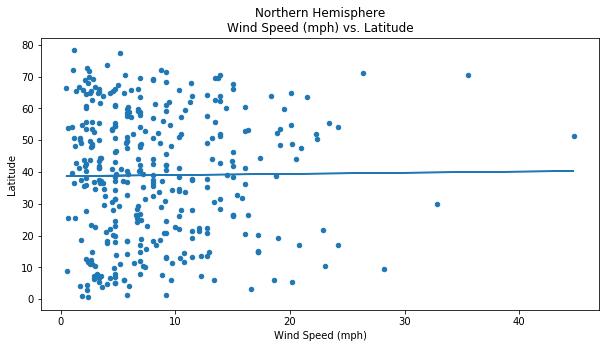

In [24]:
slope, intercept,fit_model = lin_regress(n_hemis_df['Wind Speed'], n_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Wind Speed and Latitute {n_hemis_df[['Wind Speed', 'Lat']].corr()}\n")

plt.figure(figsize=(10,5))

plt.title('Northern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(n_hemis_df['Wind Speed'],n_hemis_df['Lat'], s=20)
plt.plot(n_hemis_df['Wind Speed'], fit_model)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Slope = -0.6193904790445541
Intercept: = -16.957613208770464

Correlation between Wind Speed and Latitute             Wind Speed       Lat
Wind Speed    1.000000 -0.301982
Lat          -0.301982  1.000000



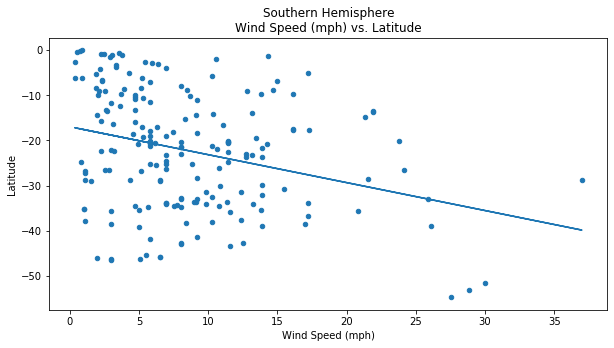

In [25]:
slope, intercept, fit_model = lin_regress(s_hemis_df['Wind Speed'], s_hemis_df['Lat'])
print(f"Slope = {slope}\nIntercept: = {intercept}\n")
print(f"Correlation between Wind Speed and Latitute {s_hemis_df[['Wind Speed', 'Lat']].corr()}\n")


plt.figure(figsize=(10,5))

plt.title('Southern Hemisphere\nWind Speed (mph) vs. Latitude')
plt.xlabel("Wind Speed (mph)")
plt.ylabel('Latitude')

plt.scatter(s_hemis_df['Wind Speed'], s_hemis_df['Lat'], s=20)
plt.plot(s_hemis_df['Wind Speed'], fit_model)
plt.show()